# **Exploratory Data Analysis (EDA)**

**Loading The Dataset**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [129]:
import gzip

with gzip.open('/content/Book_Rec.csv.gz', 'rb') as f:
     file_content = f.read()

import io
book_df = pd.read_csv(io.BytesIO(file_content))      # Try to decode it with pandas using `io.BytesIO`

In [130]:
book_df

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Age,Location,Book-Rating
0,276725,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,32.0,"tyler, texas, usa",0
1,276726,0155061224,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,32.0,"seattle, washington, usa",5
2,276727,0446520802,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,16.0,"h, new south wales, australia",0
3,276729,052165615X,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,16.0,"rijeka, n/a, croatia",3
4,276729,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,16.0,"rijeka, n/a, croatia",6
...,...,...,...,...,...,...,...,...,...,...
770398,276704,0876044011,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,32.0,"cedar park, texas, usa",0
770399,276704,1563526298,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,32.0,"cedar park, texas, usa",9
770400,276706,0679447156,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,18.0,"quebec, quebec, canada",0
770401,276709,0515107662,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,38.0,"mannington, west virginia, usa",10


**Understand the Structure of the Data**

In [131]:
# Check the shape of the dataset: number of rows and columns.

print(f'The dataset contains {book_df.shape[0]} rows and {book_df.shape[1]} columns.')

The dataset contains 770403 rows and 10 columns.


In [132]:
book_df.columns

Index(['User-ID', 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher', 'Image-URL-L', 'Age', 'Location', 'Book-Rating'],
      dtype='object')

In [133]:
#Understand data types (categorical, numerical).

book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770403 entries, 0 to 770402
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              770403 non-null  int64  
 1   ISBN                 770403 non-null  object 
 2   Book-Title           770403 non-null  object 
 3   Book-Author          770403 non-null  object 
 4   Year-Of-Publication  770403 non-null  object 
 5   Publisher            770403 non-null  object 
 6   Image-URL-L          770403 non-null  object 
 7   Age                  770403 non-null  float64
 8   Location             770403 non-null  object 
 9   Book-Rating          770403 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 58.8+ MB


In [134]:
# Convert the 'Year-Of-Publication' column to numeric, handling errors.

book_df['Year-Of-Publication'] = pd.to_numeric(book_df['Year-Of-Publication'], errors='coerce')

book_df['Year-Of-Publication'] = book_df['Year-Of-Publication'].astype('Int64')

book_df['ISBN'] = book_df['ISBN'].astype('string')
# The ISBN column is likely treated as an object data type because ISBN is alphanumeric string rather than purely numerical data.
# ISBNs may include hyphens (-) or other formatting characters.

In [135]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770403 entries, 0 to 770402
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              770403 non-null  int64  
 1   ISBN                 770403 non-null  string 
 2   Book-Title           770403 non-null  object 
 3   Book-Author          770403 non-null  object 
 4   Year-Of-Publication  769997 non-null  Int64  
 5   Publisher            770403 non-null  object 
 6   Image-URL-L          770403 non-null  object 
 7   Age                  770403 non-null  float64
 8   Location             770403 non-null  object 
 9   Book-Rating          770403 non-null  int64  
dtypes: Int64(1), float64(1), int64(2), object(5), string(1)
memory usage: 59.5+ MB


**Statistical Summary**

In [136]:
# Descriptive Statistics for Numerical Columns

book_df.describe()

,User-ID,Year-Of-Publication,Age,Book-Rating
count,770403.000000,769997.0,770403.000000,770403.000000
mean,115289.351012,1967.751547,36.295393,2.894511
std,68963.599798,233.085588,12.758545,3.869609
min,2.000000,0.0,0.000000,0.000000
25%,57960.000000,1992.0,31.000000,0.000000
50%,112026.000000,1997.0,32.000000,0.000000
75%,170073.000000,2001.0,42.000000,7.000000
max,278854.000000,2050.0,244.000000,10.000000


In [137]:
# Descriptive Statistics for Categorical Columns.

book_df.describe(include='object')

,Book-Title,Book-Author,Publisher,Image-URL-L,Location
count,770403,770403,770403,770403,770403
unique,203332,87780,14781,230819,17992
top,False,Stephen King,Ballantine Books,http://images.amazon.com/images/P/0971880107.0...,"n/a, n/a, n/a"
freq,7086,7536,25509,1832,11105


**Counting Missing Values per Column**

In [138]:
book_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,406
Publisher,0
Image-URL-L,0
Age,0
Location,0
Book-Rating,0


In [139]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

book_df['Year-Of-Publication'] = imputer.fit_transform(book_df[['Year-Of-Publication']])

In [140]:
book_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-L,0
Age,0
Location,0
Book-Rating,0


**Book Insights**

Understand the characteristics of books in the dataset.

In [141]:
# Count unique books, publishers, and authors.

unique_books = book_df['Book-Title'].nunique()
unique_publishers = book_df['Publisher'].nunique()
unique_authors = book_df['Book-Author'].nunique()

print(f'Unique Books: {unique_books}')
print(f'Unique Publishers: {unique_publishers}')
print(f'Unique Authors: {unique_authors}')

Unique Books: 203332
Unique Publishers: 14781
Unique Authors: 87780


**Popular Books**

Find the most frequently rated and highly rated books.

In [142]:
# Group data by books to calculate average ratings and number of ratings.

book_ratings = book_df.groupby('Book-Title')['Book-Rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
book_ratings.columns = ['Average Rating', 'Number of Ratings']

book_ratings

,Average Rating,Number of Ratings
Book-Title,,
"The Complete Little Nemo in Slumberland, 1907-1908 (Complete Little Nemo)",10.0,1
Gide (Ecrivains de toujours),10.0,1
Still Life in Milford: Poems,10.0,1
Ultimate Horse,10.0,1
Ultimate Hockey,10.0,1
...,...,...
Gunner Kelly,0.0,1
So Much to Be Done: Women Settlers on the Mining and Ranching Frontier (Women in the West),0.0,1
"So Much For Dreams (Harlequin Presents, No 1322)",0.0,2


In [143]:
# OR (book_ratings)
# top_books = book_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(5)
# print("Top 10 Recommended Books:\n", top_books)

In [144]:
# OR

book_stats = book_df.groupby('Book-Title')['Book-Rating'].agg(['count', 'mean']).sort_values(by='count', ascending=False)
book_stats.columns = ['count', 'mean']

#print(book_stats.head(10))
book_stats

,count,mean
Book-Title,,
False,7086,3.351256
Wild Animus,1832,1.021834
The Lovely Bones: A Novel,962,4.469854
The Da Vinci Code,669,4.596413
The Nanny Diaries: A Novel,625,3.558400
...,...,...
Mondrian (Twentieth-century masters),1,7.000000
Mondo Utah,1,0.000000
Boundaries: Where You End and I Begin,1,0.000000


**Visualization**

Bar chart of the most frequently rated books.

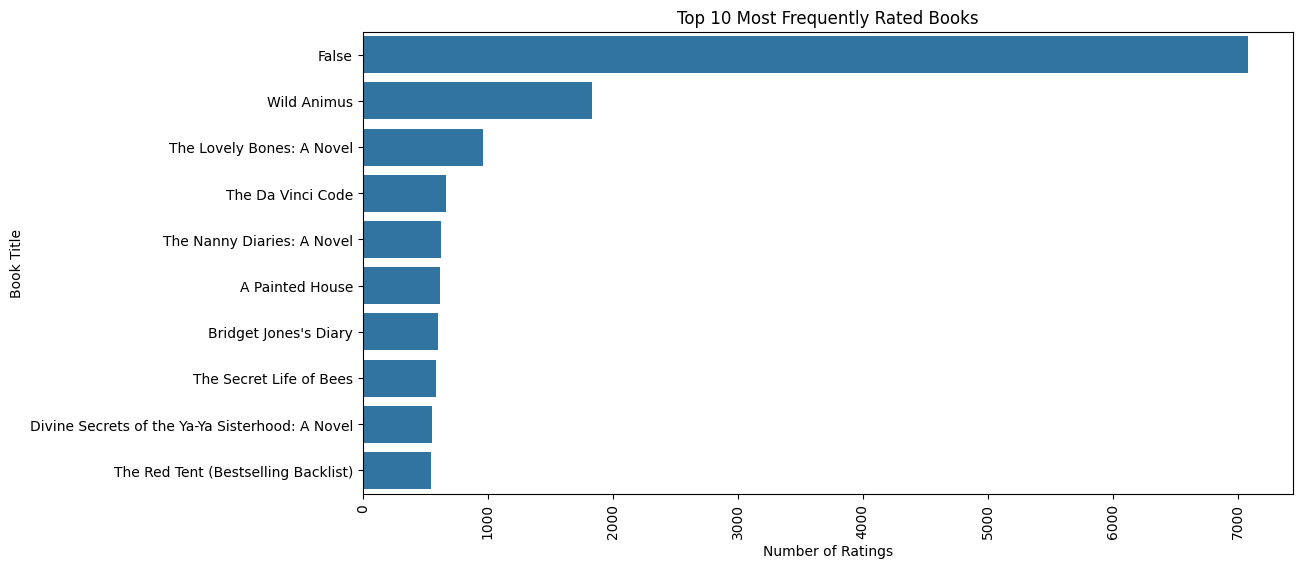

In [145]:
top_rated_books = book_stats.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_rated_books.index, x=top_rated_books['count'])
#sns.barplot(y=top_rated_books.index, x=top_rated_books['mean'])
plt.title('Top 10 Most Frequently Rated Books')
plt.ylabel('Book Title')
plt.xlabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

**Book Users Count**

In [146]:
book_users = book_df.groupby('Book-Title')['User-ID'].nunique().sort_values(ascending=False)

book_users

,User-ID
Book-Title,
False,2278
Wild Animus,1832
The Lovely Bones: A Novel,962
The Da Vinci Code,668
The Nanny Diaries: A Novel,621
...,...
North of South: An African Journey (Penguin Twentieth-Century Classics),1
North of Nowhere: An Alex McKnight Mystery (Alex McKnight Mysteries (Hardcover)),1
Drowning World: A Novel of the Commonwealth,1


**Popular Authors**

In [147]:
book_author = book_df.groupby('Book-Author')['Book-Rating'].agg(['count', 'mean']).sort_values(by='count', ascending=False)
book_author.columns = ['count', 'mean']

book_author

,count,mean
Book-Author,,
Stephen King,7536,3.685775
Nora Roberts,6072,2.825758
John Grisham,4448,3.316097
James Patterson,4332,3.170591
Mary Higgins Clark,3529,2.682630
...,...,...
Ellen Francis Harris,1,0.000000
Ellen Fitzgerald,1,0.000000
Ellen Edwards Kennedy,1,0.000000


**Visualization**

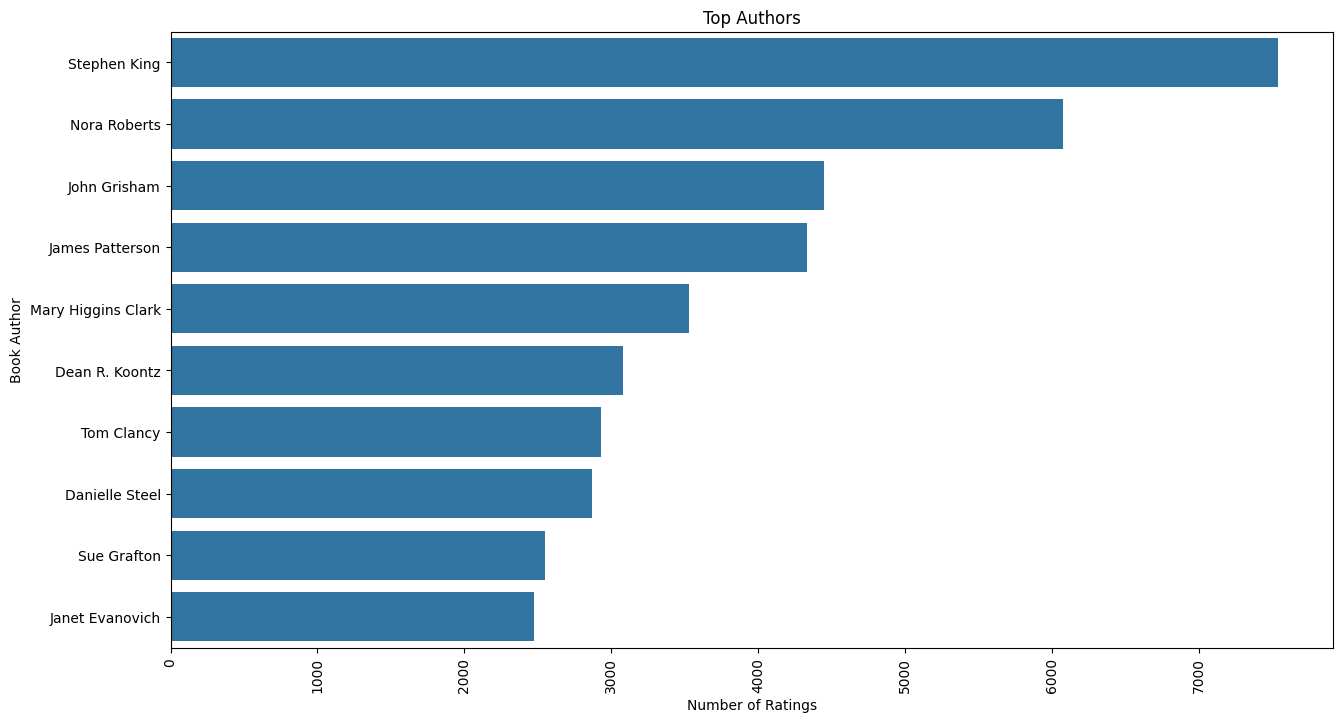

In [148]:
Top_book_author = book_author.head(10)

plt.figure(figsize=(15,8))
sns.barplot(y=Top_book_author.index, x=Top_book_author['count'])
#sns.barplot(y=Top_book_author.index, x=Top_book_author['mean'])
plt.title('Top Authors')
plt.ylabel('Book Author')
plt.xlabel('Number of Ratings')
plt.xticks(rotation=90)   # xticks( ticks ) sets the x-axis tick values, which are the locations along the x-axis where the tick marks appear.
plt.show()

**Popular Publishers**

In [149]:
book_publisher = book_df.groupby('Publisher')['Book-Rating'].agg(['count']).sort_values(by='count', ascending=False)
book_publisher.columns = ['count']

book_publisher

,count
Publisher,
Ballantine Books,25509
Pocket,23586
Berkley Publishing Group,21286
Warner Books,18839
Harlequin,18331
...,...
J C Tara Enterprises,1
J Bradbury &amp; Associates,1
"J B Communications, Incorporated",1


**Visualization**

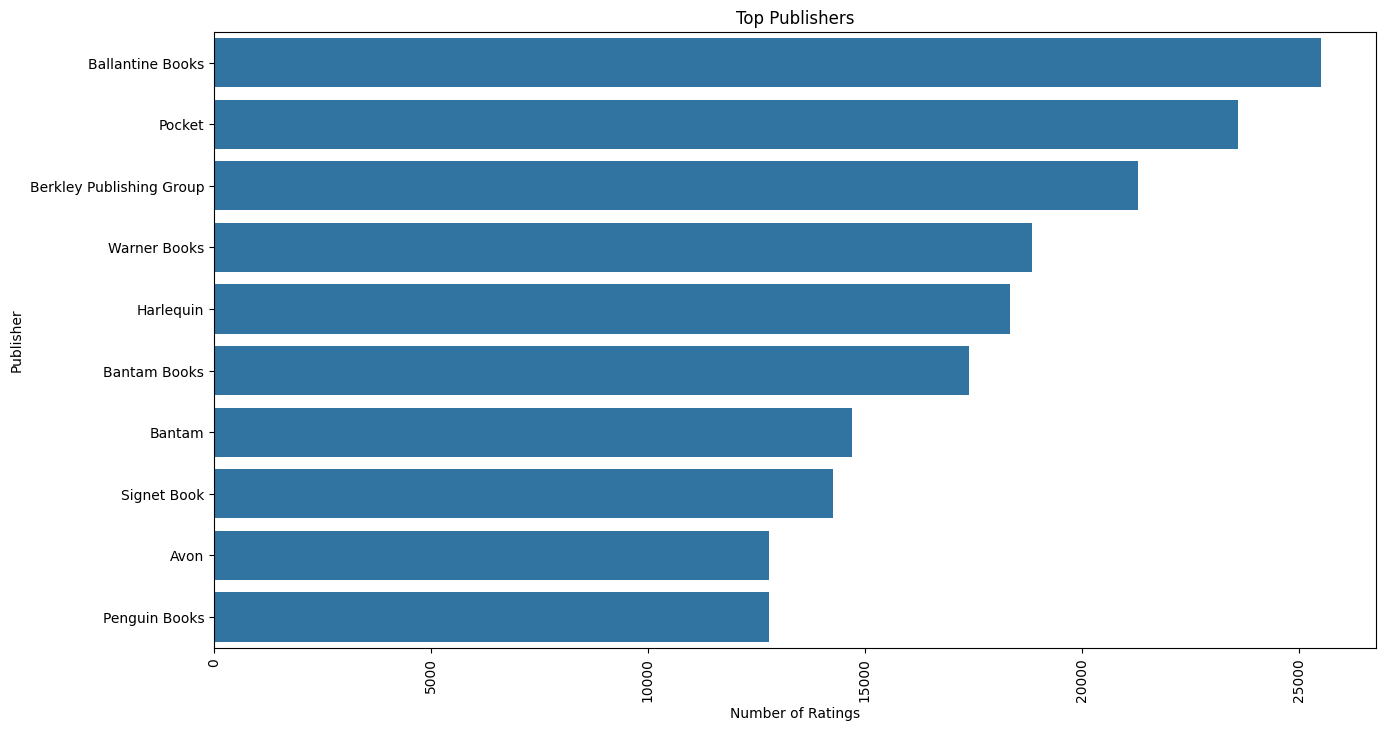

In [150]:
top_book_publisher = book_publisher.head(10)

plt.figure(figsize=(15,8))
sns.barplot(y=top_book_publisher.index, x=top_book_publisher['count'])
plt.title('Top Publishers')
plt.ylabel('Publisher')
plt.xlabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

**Year-Of-Publication**

In [151]:
# Analyzed the publication year distribution.

publication_year_counts = book_df['Year-Of-Publication'].value_counts().sort_index()

publication_year_counts

,count
Year-Of-Publication,
0.0,10644
1376.0,1
1378.0,1
1806.0,1
1897.0,1
...,...
2024.0,1
2026.0,4
2030.0,23


**Visualization**

Line chart or histogram of publication years.

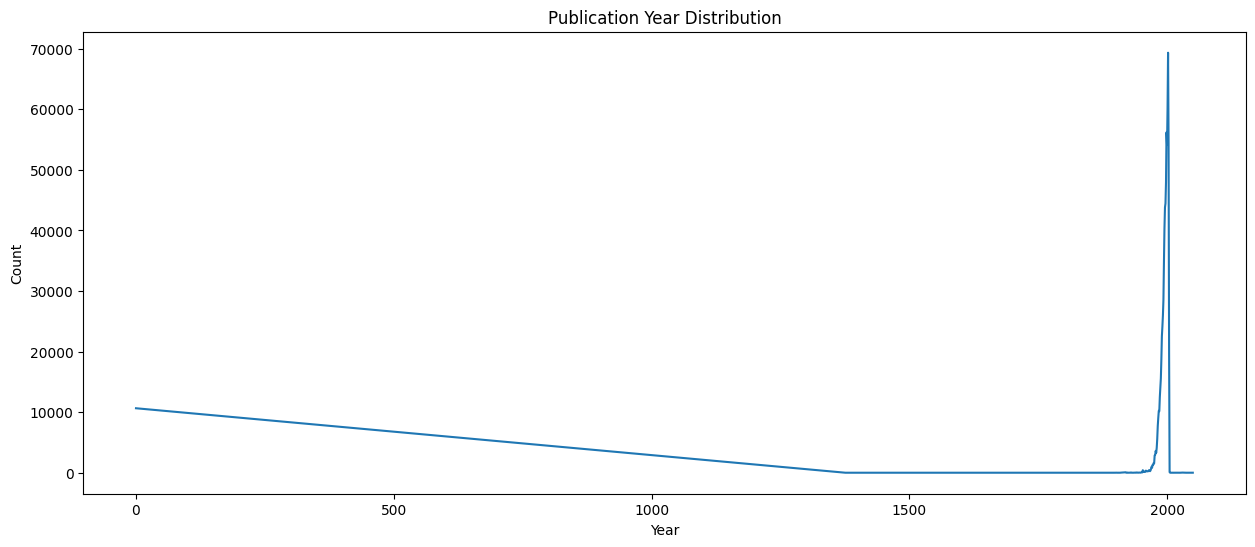

In [152]:
publication_year_counts.plot(kind='line', figsize=(15, 6))
plt.title('Publication Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Age Distribution**

In [153]:
age_counts = book_df['Age'].value_counts().sort_index()

age_counts

,count
Age,
0.0,409
1.0,305
2.0,206
3.0,141
4.0,257
...,...
228.0,41
229.0,11
237.0,3


**Visualization**

Check the Distribution

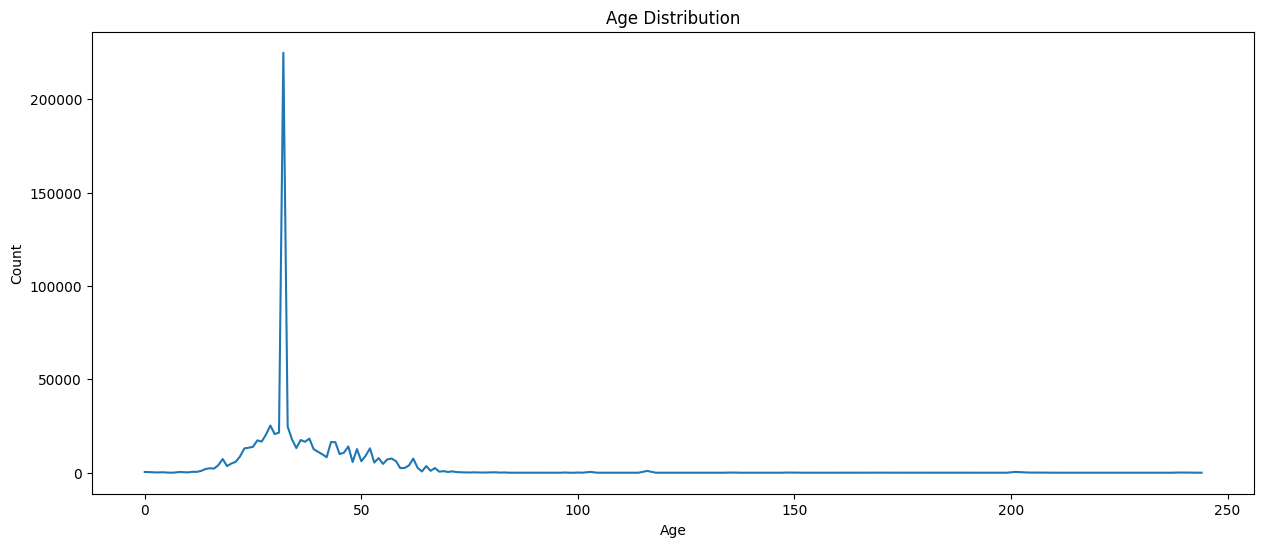

In [154]:
age_counts.plot(kind='line', figsize=(15, 6))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

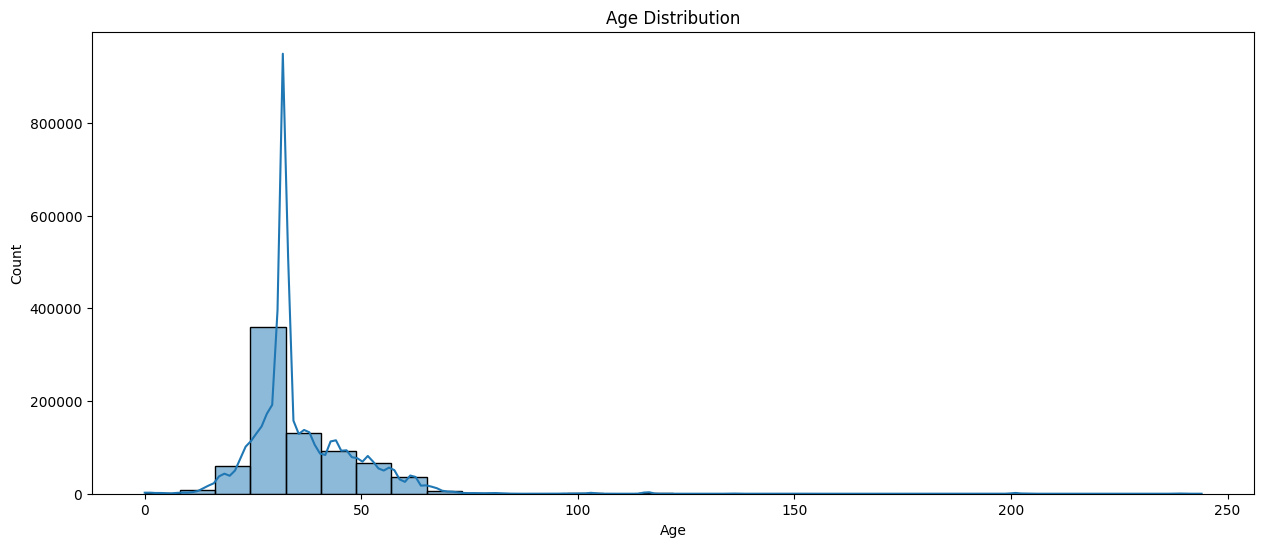

In [155]:
# Histogram.
plt.figure(figsize=(15, 6))
sns.histplot(book_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Check for Outliers**

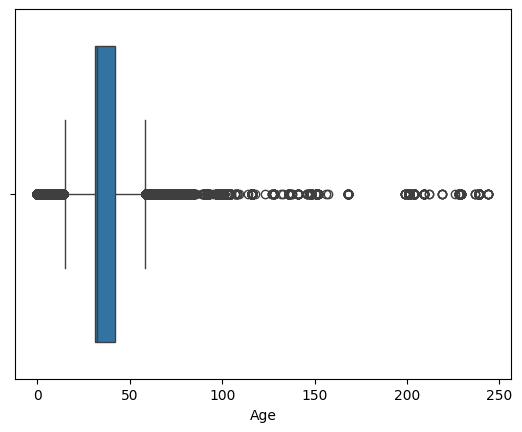

In [156]:
# If there are extreme values, the median is more robust.

sns.boxplot(x=book_df['Age'])
plt.show()

**Age and Location Counts**

In [157]:
age_location_counts = book_df.groupby(['Age', 'Location']).size().reset_index(name='Count')

age_location_counts

,Age,Location,Count
0,0.0,False,113
1,0.0,"abingdon, oxon, united kingdom",2
2,0.0,"adelaide, south australia, australia",1
3,0.0,"arlington, virginia, usa",3
4,0.0,"aurora, colorado, usa",1
...,...,...,...
39930,228.0,"las vegas, nevada, usa",1
39931,229.0,"lake mary, florida, usa",11
39932,237.0,"midvale, utah, usa",3
39933,239.0,"calgary, alberta, canada",116


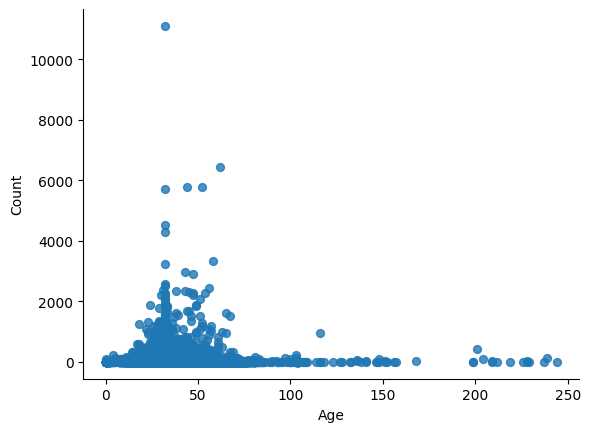

In [158]:
from matplotlib import pyplot as plt

age_location_counts.plot(kind='scatter', x='Age', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Rating Distribution**

Users rate books.

In [159]:
# Analyze the distribution of Book-Rating.

rating_counts = book_df['Book-Rating'].value_counts()

rating_counts   # Identify patterns in high or low ratings.

,count
Book-Rating,
0,477917
8,69469
10,54003
7,50727
9,46646
5,35305
6,24031
4,5653
3,3770


**Visualization**

Histogram of ratings.

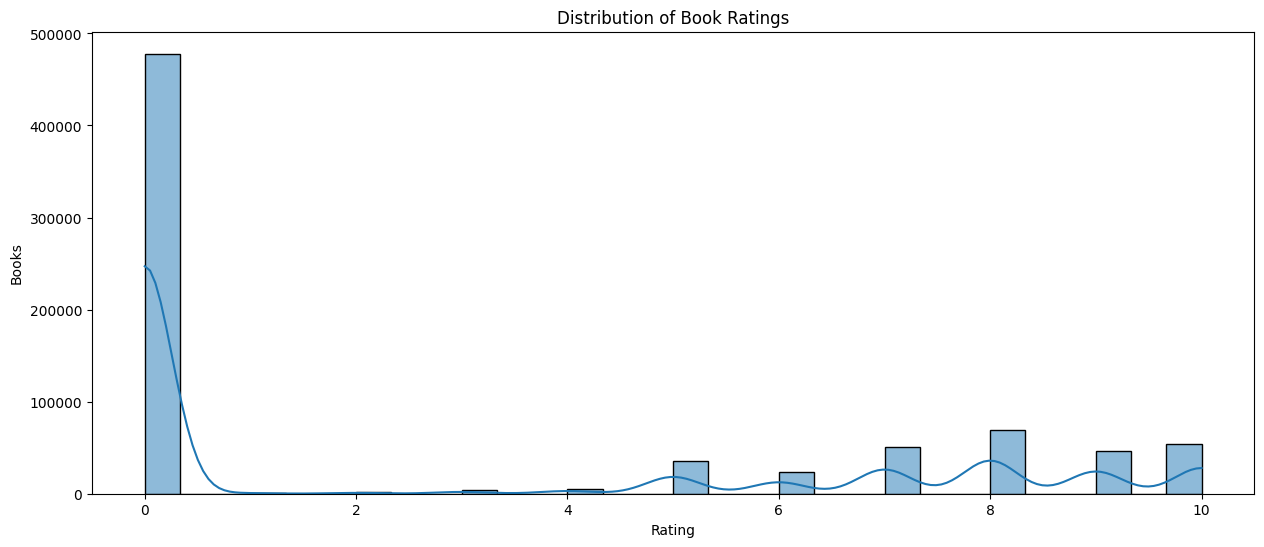

In [160]:
plt.figure(figsize=(15, 6))
sns.histplot(book_df['Book-Rating'], bins=30, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Books')
plt.show()

 **User Activity Distribution:**

In [161]:
# Analyze how many books each user has rated.

user_rating_counts = book_df['User-ID'].value_counts()

user_rating_counts

,count
User-ID,
11676,11087
198711,6432
153662,5789
98391,5767
35859,5622
...,...
95329,1
95335,1
95347,1


**Visualization**

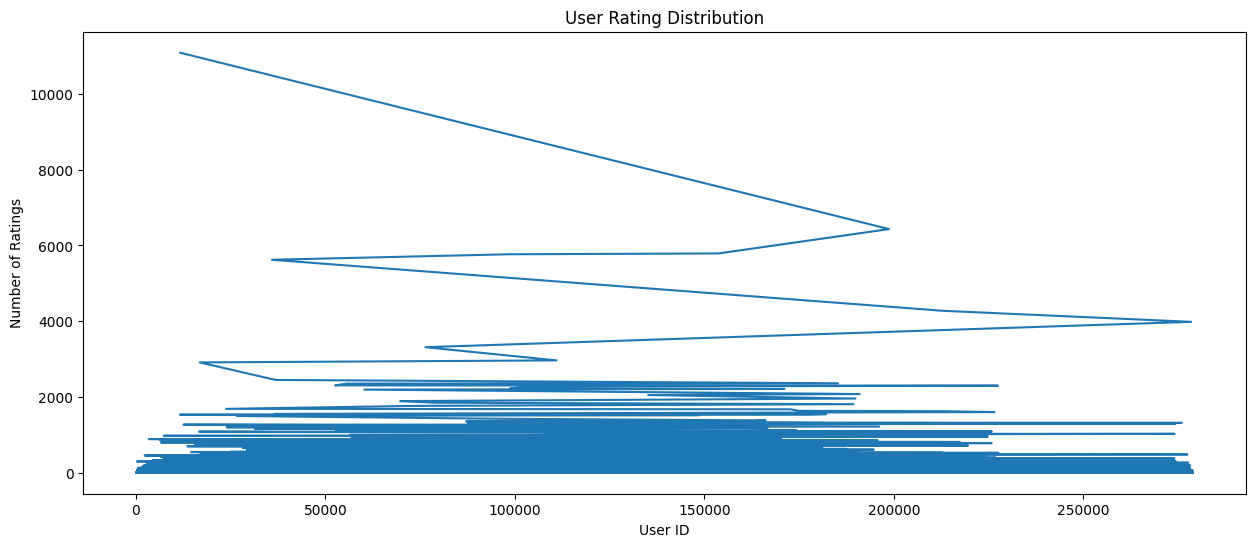

In [162]:
# Visualize the distribution of ratings per user to identify outliers or inactive users.

user_rating_counts.plot(kind='line', figsize=(15, 6))
plt.title('User Rating Distribution')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

**Rating Pattern**

In [163]:
user_mean_ratings = book_df.groupby('User-ID')['Book-Rating'].mean()

user_mean_ratings

,Book-Rating
User-ID,
2,0.000000
8,2.294118
9,2.000000
10,0.000000
12,10.000000
...,...
278846,8.000000
278849,2.250000
278851,3.956522


In [164]:
book_mean_ratings = book_df.groupby('Book-Title')['Book-Rating'].mean()

book_mean_ratings

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25
Always Have Popsicles,0.00
Apple Magic (The Collector's series),0.00
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),0.00
...,...
¡Dímelo tu!,7.00
¡No bajes al sótano! (Escalofríos No. 2),0.00
¿Eres tu mi mamá?/Are You My Mother?,9.00


**User Demographics**

The distribution of users by location and activity.

In [165]:
# Count unique users (User-ID) and analyze their locations.

unique_users = book_df['User-ID'].nunique()
user_location_counts = book_df['Location'].value_counts()

print(f'Unique Users: {unique_users}')
print(f'User Location Counts:\n{user_location_counts}')

Unique Users: 68862
User Location Counts:
Location
n/a, n/a, n/a                     11105
False                             10781
toronto, ontario, canada           9442
olympia, washington, usa           7323
chicago, illinois, usa             7162
                                  ...  
innsbruck, tyrol, austria             1
nelson, tasman, new zealand           1
the woodlands, ,                      1
monmouth, illinois, usa               1
mannington, west virginia, usa        1
Name: count, Length: 17992, dtype: int64


In [166]:
users_age = book_df['Age'].nunique()
user_age_counts = book_df['Age'].value_counts()

print(f'Unique Users: {users_age}')
print(f'User Age Counts:\n{user_age_counts}')

Unique Users: 135
User Age Counts:
Age
32.0     224959
29.0      25287
33.0      24664
31.0      21490
30.0      20708
          ...  
156.0         1
98.0          1
123.0         1
118.0         1
86.0          1
Name: count, Length: 135, dtype: int64


In [167]:
age_location = book_df.groupby(['Age', 'Location']).size().reset_index(name='Count')

age_location

,Age,Location,Count
0,0.0,False,113
1,0.0,"abingdon, oxon, united kingdom",2
2,0.0,"adelaide, south australia, australia",1
3,0.0,"arlington, virginia, usa",3
4,0.0,"aurora, colorado, usa",1
...,...,...,...
39930,228.0,"las vegas, nevada, usa",1
39931,229.0,"lake mary, florida, usa",11
39932,237.0,"midvale, utah, usa",3
39933,239.0,"calgary, alberta, canada",116


**User-Book Interactions**

Assess the sparsity and density of user-book interactions.

In [168]:
interactions_count = book_df.shape[0]
unique_users_count = book_df['User-ID'].nunique()   # nunique() - method returns the number of unique values for each column.
unique_books_count = book_df['Book-Title'].nunique()

print(f'Total Interactions: {interactions_count}')
print(f'Unique Users: {unique_users_count}')
print(f'Unique Books: {unique_books_count}')

Total Interactions: 770403
Unique Users: 68862
Unique Books: 203332


**Reduce the Size of the Dataset**

Filter the dataset to include only frequently rated books or active users.

In [169]:
# Filter books with more than 50 ratings
popular_books = book_df['Book-Title'].value_counts()
popular_books = popular_books[popular_books > 50].index

# Filter active users who have rated at least 10 books
active_users = book_df['User-ID'].value_counts()
active_users = active_users[active_users > 10].index

# Subset the data
filtered_df = book_df[book_df['Book-Title'].isin(popular_books) & book_df['User-ID'].isin(active_users)]


In [170]:
print(f'Total Interactions: {filtered_df.shape[0]}')
print(f'Unique Users: {filtered_df["User-ID"].nunique()}')
print(f'Unique Books: {filtered_df["Book-Title"].nunique()}')

Total Interactions: 145061
Unique Users: 7665
Unique Books: 1602


In [171]:
popular_books

Index(['False', 'Wild Animus', 'The Lovely Bones: A Novel',
       'The Da Vinci Code', 'The Nanny Diaries: A Novel', 'A Painted House',
       'Bridget Jones's Diary', 'The Secret Life of Bees',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
       'The Red Tent (Bestselling Backlist)',
       ...
       'Her Father's House', 'Dying to Please',
       'Kitchen Confidential: Adventures in the Culinary Underbelly',
       'Tunnel Vision (V.I. Warshawski Novels (Paperback))', 'Stuart Little',
       'The Associate', 'Last Orders', 'Remembrance', 'Where There's Smoke',
       'Inca Gold (Clive Cussler)'],
      dtype='object', name='Book-Title', length=1602)

In [172]:
active_users

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
        16795,
       ...
       102262, 222884, 189725, 164413,  79110, 110771, 227392, 227282, 126444,
       147680],
      dtype='int64', name='User-ID', length=8126)

In [173]:
filtered_df.head(10)

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Age,Location,Book-Rating
28,276762,0451167317,The Dark Half,Stephen King,1994.0,Signet Book,http://images.amazon.com/images/P/0451167317.0...,25.0,"duisburg, nordrhein-westfalen, germany",0
35,276762,3442425573,False,Hanns Kneifel,1996.0,Goldmann,http://images.amazon.com/images/P/3442425573.0...,25.0,"duisburg, nordrhein-westfalen, germany",0
40,276762,3517017442,False,Heidelore Kluge,1995.0,False,http://images.amazon.com/images/P/3517017442.0...,25.0,"duisburg, nordrhein-westfalen, germany",0
65,276798,3442131340,False,Patricia Cornwell,2001.0,Goldmann,http://images.amazon.com/images/P/3442131340.0...,31.0,"mannheim, baden-wuerttemberg, germany",7
66,276798,3446202102,False,Jostein Gaarder,2002.0,Hanser Belletristik,http://images.amazon.com/images/P/3446202102.0...,31.0,"mannheim, baden-wuerttemberg, germany",0
99,276822,0060096195,The Boy Next Door,Meggin Cabot,2002.0,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,11.0,"calgary, alberta, canada",10
109,276822,0786817070,"Artemis Fowl (Artemis Fowl, Book 1)",Eoin Colfer,2002.0,Miramax Kids,http://images.amazon.com/images/P/0786817070.0...,11.0,"calgary, alberta, canada",10
117,276828,2070403734,False,Jean-Jacques Rousseau,1997.0,Gallimard,http://images.amazon.com/images/P/2070403734.0...,32.0,"paris, paris, france",0
119,276828,2232122263,False,Paul Eluard,2002.0,Seghers,http://images.amazon.com/images/P/2232122263.0...,32.0,"paris, paris, france",0
125,276828,2842190009,False,Jean-Bernard Pouy,1997.0,Baleine,http://images.amazon.com/images/P/2842190009.0...,32.0,"paris, paris, france",0


In [174]:
filtered_df.shape

(145061, 10)

**Use Sparse Matrices**

Instead of a dense DataFrame, use a scipy sparse matrix to handle large data efficiently.

In [175]:
from scipy.sparse import csr_matrix

# Create a pivot table using pivot_table to handle duplicate entries by aggregation
pivot_table = filtered_df.pivot_table(
    index='User-ID',
    columns='Book-Title',
    values='Book-Rating',
    aggfunc='mean'  # You can choose other aggregation functions like 'first', 'last', etc.
).fillna(0)

# Convert to a sparse matrix
sparse_matrix = csr_matrix(pivot_table.values)

**Use a Sample of the Data**

Work with a smaller subset of the data for EDA or prototyping.

In [176]:
# Top 500 active users and popular books
top_users = book_df['User-ID'].value_counts().head(500).index
top_books = book_df['Book-Title'].value_counts().head(500).index

# Subset the data
sample_df = book_df[book_df['User-ID'].isin(top_users) & book_df['Book-Title'].isin(top_books)]

# Create the interaction matrix
interaction_matrix = sample_df.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [177]:
# Interaction_matrix - Pickle file
import pickle

with open('interaction_matrix.pkl', 'wb') as f:
    pickle.dump(interaction_matrix, f)

In [178]:
top_users

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
        16795,
       ...
        31846,  76151, 102275,  70594, 160032,  22625,  95903, 152186,  98758,
       147451],
      dtype='int64', name='User-ID', length=500)

In [179]:
top_books

Index(['False', 'Wild Animus', 'The Lovely Bones: A Novel',
       'The Da Vinci Code', 'The Nanny Diaries: A Novel', 'A Painted House',
       'Bridget Jones's Diary', 'The Secret Life of Bees',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
       'The Red Tent (Bestselling Backlist)',
       ...
       'Mirror Image', 'A Wrinkle In Time',
       'The Deep End of the Ocean (Oprah's Book Club (Hardcover))',
       'Divine Secrets of the Ya-Ya Sisterhood : A Novel',
       'The Lost Boy: A Foster Child's Search for the Love of a Family',
       'The Four Agreements: A Practical Guide to Personal Freedom',
       'The Diary of Ellen Rimbauer: My Life at Rose Red',
       'Ishmael: An Adventure of the Mind and Spirit',
       'Debt of Honor (Jack Ryan Novels)', 'The Secret Garden'],
      dtype='object', name='Book-Title', length=500)

In [180]:
sample_df.head(10)

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Age,Location,Book-Rating
1143,277427,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,48.0,"gilbert, arizona, usa",10
1156,277427,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999.0,Perennial,http://images.amazon.com/images/P/0060930535.0...,48.0,"gilbert, arizona, usa",0
1158,277427,0060934417,Bel Canto: A Novel,Ann Patchett,2002.0,Perennial,http://images.amazon.com/images/P/0060934417.0...,48.0,"gilbert, arizona, usa",0
1161,277427,0061009059,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,48.0,"gilbert, arizona, usa",9
1167,277427,006440188X,The Secret Garden,Frances Hodgson Burnett,1998.0,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,48.0,"gilbert, arizona, usa",0
1170,277427,0140067477,The Tao of Pooh,Benjamin Hoff,1983.0,Penguin Books,http://images.amazon.com/images/P/0140067477.0...,48.0,"gilbert, arizona, usa",0
1175,277427,014029628X,Girl in Hyacinth Blue,Susan Vreeland,2000.0,Penguin Books,http://images.amazon.com/images/P/014029628X.0...,48.0,"gilbert, arizona, usa",0
1179,277427,014100018X,Chocolat,Joanne Harris,2000.0,Penguin Books,http://images.amazon.com/images/P/014100018X.0...,48.0,"gilbert, arizona, usa",0
1181,277427,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,48.0,"gilbert, arizona, usa",0
1199,277427,0312966091,Three To Get Deadly : A Stephanie Plum Novel (...,Janet Evanovich,1998.0,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312966091.0...,48.0,"gilbert, arizona, usa",0


In [181]:
interaction_matrix.shape

(500, 499)

In [182]:
interaction_matrix.fillna(0, inplace = True)

interaction_matrix

User-ID,254,2276,2766,3363,4385,6251,6543,6575,7158,7286,...,227705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Case of Need,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Without Remorse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
interaction_matrix.index[254]

'Phantoms'

**Visualization**

Heatmap of a small subset of the user-book interaction matrix.

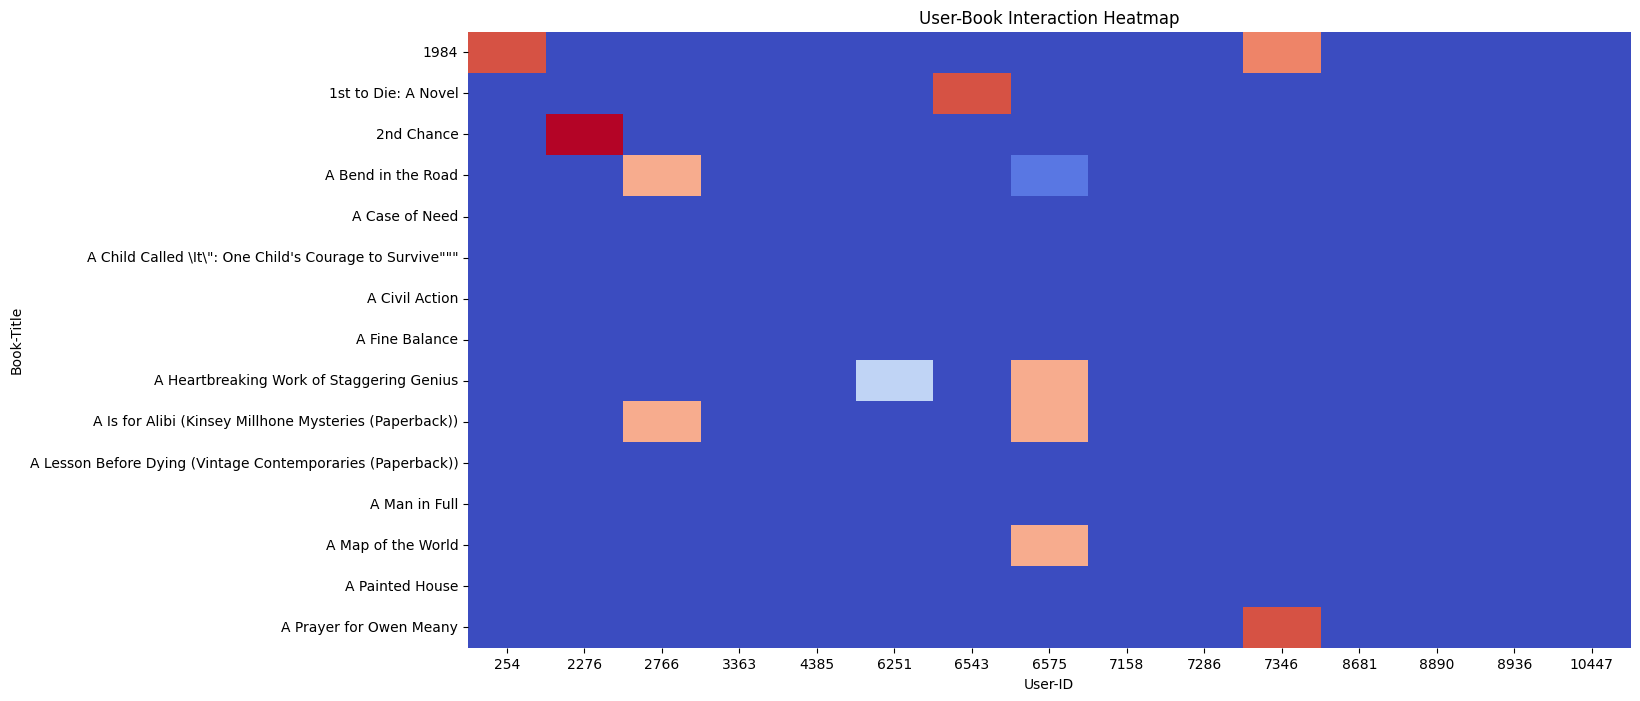

In [184]:
subset = interaction_matrix.iloc[:15, :15]  # Small subset for visualization
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(subset, cmap='coolwarm', cbar=False)
plt.title('User-Book Interaction Heatmap')
plt.show()

**Clustering and Segmentation**

In [185]:
# Cluster users based on their preferences using techniques like K-Means or DBSCAN.
# Group similar books based on ratings or content.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

user_book_matrix = interaction_matrix.fillna(0)
kmeans = KMeans(n_clusters=5).fit(user_book_matrix)

**Heatmaps**

Visualize correlations or interaction matrices using a heatmap.

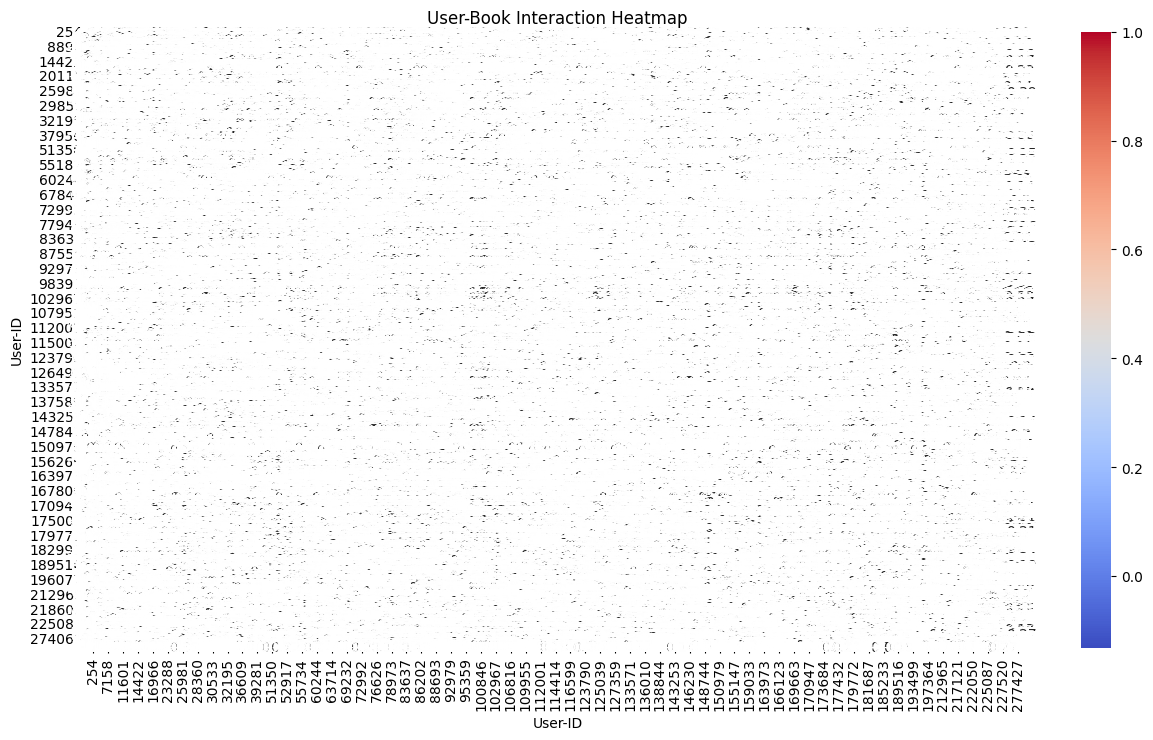

In [186]:
plt.figure(figsize=(15, 8))
sns.heatmap(user_book_matrix.corr(), annot=True, cmap='coolwarm')
plt.title('User-Book Interaction Heatmap')
plt.show()

**Scatterplot of Book Ratings**

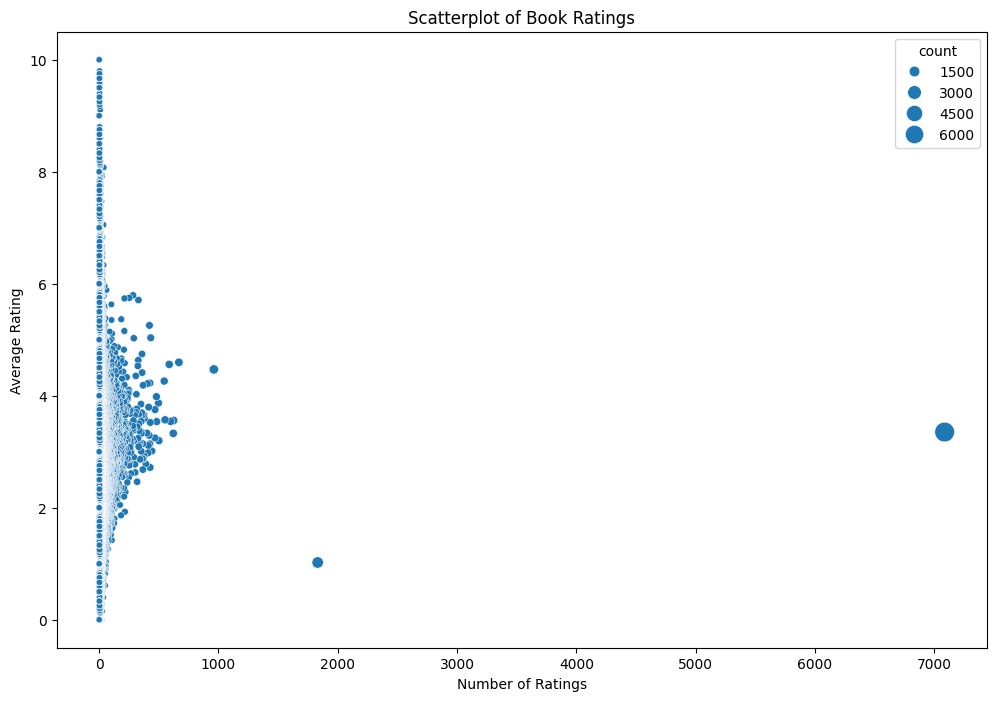

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot of book ratings
plt.figure(figsize=(12, 8))
sns.scatterplot(data=book_stats, x='count', y='mean', size='count', sizes=(20, 200))
plt.title('Scatterplot of Book Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

**Recommendations-Ready Data**

Prepared data for recommendation modeling.

In [188]:
popular_books = book_stats[book_stats['count'] >= 50].sort_values(by='mean', ascending=False)

print(f"Books with more than 50 ratings: {len(popular_books)}")

Books with more than 50 ratings: 1653


In [189]:
popular_books.head(10)

,count,mean
Book-Title,,
The Hobbit,63,5.888889
Harry Potter and the Goblet of Fire (Book 4),285,5.792982
Harry Potter and the Order of the Phoenix (Book 5),254,5.748031
Harry Potter and the Sorcerer's Stone (Book 1),213,5.737089
Harry Potter and the Prisoner of Azkaban (Book 3),330,5.709091
The Little Prince,103,5.631068
The Lord of the Rings (Movie Art Cover),50,5.580000
The Hobbit: or There and Back Again,55,5.381818
Ender's Game (Ender Wiggins Saga (Paperback)),186,5.365591


**Word Cloud of Book-Title**

A word cloud is not strictly necessary for a book recommendation system project, but it can be a useful and visually appealing tool for the EDA phase.

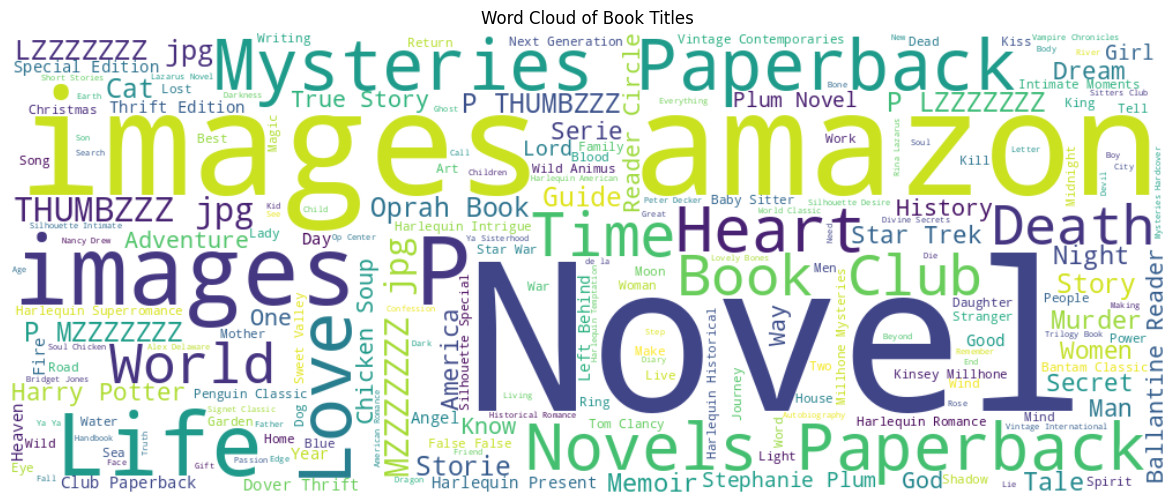

In [190]:
from wordcloud import WordCloud

# Combine all book titles into a single string
text = ' '.join(book_df['Book-Title'].fillna(''))

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Titles')
plt.show()

# **Additional Information**

**Leverage Distributed Computing**

Used distributed computing frameworks like Dask or PySpark to handle larger datasets efficiently.

In [191]:
import dask.dataframe as dd

ddf = dd.from_pandas(book_df, npartitions=4)  # Create a Dask DataFrame from the Pandas DataFrame

Save Intermediate Results

Save filtered or processed data to disk and reload it to avoid recomputing large structures.

In [192]:
filtered_df.to_csv('filtered_data.csv', index=False)

# **Train - Test Split**

In [193]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(filtered_df, test_size=0.2, random_state=42)

In [194]:
print("Training set size:", train_data.shape)
print("Testing set size:", test_data.shape)

Training set size: (116048, 10)
Testing set size: (29013, 10)


# **Feature Engineering / Extraction**

**User Features**

Demographics -
Age (normalized or categorized),
Location (country, city),
Activity level (number of books rated).

In [195]:
user_activity = filtered_df.groupby('User-ID')['Book-Rating'].count()
user_activity

,Book-Rating
User-ID,
8,1
99,5
242,17
243,56
254,87
...,...
278633,38
278637,4
278771,2


**Popularity-Based Features**

**Book Features**


In [196]:
popular_books = filtered_df.groupby('Book-Title')['Book-Rating'].agg(['mean', 'count'])
popular_books.columns = ['Average_Rating', 'Number_of_Ratings']
popular_books.reset_index(inplace=True)
popular_books

,Book-Title,Average_Rating,Number_of_Ratings
0,1984,4.541096,146
1,1st to Die: A Novel,3.181495,281
2,2010: Odyssey Two,2.203390,59
3,24 Hours,2.129032,62
4,2nd Chance,2.977064,218
...,...,...,...
1597,Year of Wonders,3.910000,100
1598,You Belong To Me,2.220779,77
1599,Zen and the Art of Motorcycle Maintenance: An ...,3.292453,106
1600,Zoya,1.426667,75


 **Interaction Features**

User-Book Interaction Matrix

In [197]:
interaction_matrix = filtered_df.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
interaction_matrix

User-ID,8,99,242,243,254,383,388,408,424,446,...,278522,278535,278554,278563,278582,278633,278637,278771,278843,278851
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Sparsity Check**

To ensure efficient processing:

In [198]:
sparcity = 1 - (filtered_df.shape[0] / (interaction_matrix.shape[0] * interaction_matrix.shape[1]))
print(f"Sparsity of the interaction matrix: {sparcity * 100:.2f}%")

Sparsity of the interaction matrix: 98.82%


**Text-Based Features from Book Titles or Descriptions**

TF-IDF (Term Frequency-Inverse Document Frequency) -

Converts textual data into numerical vectors.

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(filtered_df['Book-Title'])

**Normalize Numeric Data**

Normalize ratings if needed (e.g., scaling between 0 and 1).

In [200]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
filtered_df['Book-Rating'] = scaler.fit_transform(filtered_df[['Book-Rating']])

**Collaborative Filtering Features**
    
Extract latent features using matrix factorization techniques:
        
Singular Value Decomposition (SVD):
Reduces the user-item interaction matrix to lower dimensions.

In [201]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10)
latent_features = svd.fit_transform(tfidf_matrix)

**Cross-Feature Engineering**

Combine multiple features to create hybrid features:
*  User preferences weighted by book popularity.
*  Interaction scores normalized by user activity.



In [202]:
# Calculate book popularity metrics
book_popularity = filtered_df.groupby('Book-Title')['Book-Rating'].agg(['mean', 'count'])
book_popularity.columns = ['Average_Rating', 'Total_Ratings']

# Merge book popularity with the main dataset
df_hybrid = pd.merge(filtered_df, book_popularity, on='Book-Title', how='left')

# Weight user's ratings by book popularity
df_hybrid['Weighted_Rating'] = df_hybrid['Book-Rating'] * df_hybrid['Total_Ratings']

In [203]:
# Calculate user activity metrics
user_activity = filtered_df.groupby('User-ID')['Book-Rating'].count().reset_index()
user_activity.columns = ['User-ID', 'Total_User_Ratings']

# Merge user activity back to the main dataset
df_hybrid = pd.merge(df_hybrid, user_activity, on='User-ID', how='left')

# Normalize the interaction scores
df_hybrid['Normalized_Interaction'] = df_hybrid['Book-Rating'] / df_hybrid['Total_User_Ratings']

In [204]:
df_hybrid.head(10)

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Age,Location,Book-Rating,Average_Rating,Total_Ratings,Weighted_Rating,Total_User_Ratings,Normalized_Interaction
0,276762,0451167317,The Dark Half,Stephen King,1994.0,Signet Book,http://images.amazon.com/images/P/0451167317.0...,25.0,"duisburg, nordrhein-westfalen, germany",0.0,0.346939,147,0.0,3,0.00
1,276762,3442425573,False,Hanns Kneifel,1996.0,Goldmann,http://images.amazon.com/images/P/3442425573.0...,25.0,"duisburg, nordrhein-westfalen, germany",0.0,0.317819,4933,0.0,3,0.00
2,276762,3517017442,False,Heidelore Kluge,1995.0,False,http://images.amazon.com/images/P/3517017442.0...,25.0,"duisburg, nordrhein-westfalen, germany",0.0,0.317819,4933,0.0,3,0.00
3,276798,3442131340,False,Patricia Cornwell,2001.0,Goldmann,http://images.amazon.com/images/P/3442131340.0...,31.0,"mannheim, baden-wuerttemberg, germany",0.7,0.317819,4933,3453.1,2,0.35
4,276798,3446202102,False,Jostein Gaarder,2002.0,Hanser Belletristik,http://images.amazon.com/images/P/3446202102.0...,31.0,"mannheim, baden-wuerttemberg, germany",0.0,0.317819,4933,0.0,2,0.00
5,276822,0060096195,The Boy Next Door,Meggin Cabot,2002.0,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,11.0,"calgary, alberta, canada",1.0,0.357333,75,75.0,2,0.50
6,276822,0786817070,"Artemis Fowl (Artemis Fowl, Book 1)",Eoin Colfer,2002.0,Miramax Kids,http://images.amazon.com/images/P/0786817070.0...,11.0,"calgary, alberta, canada",1.0,0.323776,143,143.0,2,0.50
7,276828,2070403734,False,Jean-Jacques Rousseau,1997.0,Gallimard,http://images.amazon.com/images/P/2070403734.0...,32.0,"paris, paris, france",0.0,0.317819,4933,0.0,3,0.00
8,276828,2232122263,False,Paul Eluard,2002.0,Seghers,http://images.amazon.com/images/P/2232122263.0...,32.0,"paris, paris, france",0.0,0.317819,4933,0.0,3,0.00
9,276828,2842190009,False,Jean-Bernard Pouy,1997.0,Baleine,http://images.amazon.com/images/P/2842190009.0...,32.0,"paris, paris, france",0.0,0.317819,4933,0.0,3,0.00


# **Model Building**

# **Collaborative Filtering: Building the Model**

Collaborative filtering is a popular approach for building recommendation systems.

**Build User-User Collaborative Filtering.**

Create a User-Item Interaction Matrix

In [205]:
interaction_matrix = filtered_df.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating').fillna(0)

In [206]:
interaction_matrix

User-ID,8,99,242,243,254,383,388,408,424,446,...,278522,278535,278554,278563,278582,278633,278637,278771,278843,278851
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Compute Similarity Matrix**

Use cosine similarity to calculate similarities between users.

In [207]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Transpose interaction_matrix so users are rows and books are columns
user_interaction_matrix = interaction_matrix.T

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_interaction_matrix)

# Create DataFrame with user IDs as index and columns
user_similarity_df = pd.DataFrame(user_similarity,
                                 index=user_interaction_matrix.index,
                                 columns=user_interaction_matrix.index)

**Make Recommendations**

Identified similar users and recommend books they rated highly.

In [208]:
def recommend_books(user_id, num_recommendations=5):
    # Convert user_id to the correct data type if necessary
    # If your user IDs are strings, use: user_id = str(user_id)

    # Check if user_id exists in the DataFrame's index
    if user_id not in user_similarity_df.index:
        raise KeyError(f"User ID {user_id} not found in the similarity matrix.")

    # Get the top N similar users
    # Use .loc to access rows by label
    similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False)[1:num_recommendations+1].index

    # Get books rated highly by similar users
    similar_user_ratings = interaction_matrix.loc[:, similar_users]  # Select columns for similar users
    similar_user_top_books = similar_user_ratings.mean(axis=1).sort_values(ascending=False)  # Average ratings across similar users
    similar_user_top_books = similar_user_top_books[similar_user_top_books > 0]

    return similar_user_top_books

In [209]:
recommend_books(278535)

,0
Book-Title,
1st to Die: A Novel,0.66
Roses Are Red (Alex Cross Novels),0.50
Violets Are Blue,0.48
"The Fellowship of the Ring (The Lord of the Rings, Part 1)",0.20
Mortal Prey,0.18
The Sweet Potato Queens' Book of Love,0.18
Chosen Prey,0.18
Cradle and All,0.16
Dreamcatcher,0.16


In [210]:
recommend_books(408).index

Index(['The Hobbit : The Enchanting Prelude to The Lord of the Rings',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Soul Harvest: The World Takes Sides (Left Behind No. 4)',
       'Nicolae: The Rise of Antichrist (Left Behind No. 3)',
       'Desecration: Antichrist Takes the Throne (Left Behind No. 9)',
       'Tribulation Force: The Continuing Drama of Those Left Behind (Left Behind No. 2)',
       'Death du Jour', 'The Blind Assassin',
       'The Waste Lands (The Dark Tower, Book 3)',
       'Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)',
       'The Purpose-Driven Life: What on Earth Am I Here For?',
       'Where the Red Fern Grows',
       'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))',
       'Firestarter', 'A Wrinkle In Time', 'Weep No More My Lady',
       'While My Pretty One Sleeps', 'Seven Habits Of Highly Effective People',
       'The Poisonwood Bible: A Novel', 'Two for the Dough',
       'Bridge to Terabi

In [211]:
# interaction_matrix.loc[recommend_books(408).index]

interaction_matrix.index[408]

'False'

**Model Evaluation**

**Import Necessary Libraries**

In [212]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

**Split Data into Training and Testing Sets**

In [213]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(filtered_df, test_size=0.2, random_state=42)

**Generate Recommendations and Ground Truth**

Recommendations: Used trained model to predict ratings or rankings for the user-item pairs in the test set.                                         
Ground Truth: actual ratings or interactions from the test set.


In [214]:
# Assuming 'recommend_books' function returns top-N recommendations for a user
def get_recommendations(user_id, top_n=10):
    recommendations = recommend_books(user_id, num_recommendations=top_n).index.tolist()
    return recommendations

# Get ground truth interactions from test data
ground_truth = test_data.groupby('User-ID')['Book-Title'].apply(list).to_dict()

# Generate recommendations for users in the test set
all_recommendations = {}
for user_id in test_data['User-ID'].unique():
    all_recommendations[user_id] = get_recommendations(user_id)

**Calculate Evaluation Metrics**

In [215]:
def precision_at_k(recommended_items, relevant_items, k):
    # Get the top-k recommended items
    recommended_at_k = recommended_items[:k]
    # Find intersection with relevant items
    relevant_in_recommended = set(recommended_at_k).intersection(set(relevant_items))
    # Calculate precision
    return len(relevant_in_recommended) / k

def recall_at_k(recommended_items, relevant_items, k):
    # Get the top-k recommended items
    recommended_at_k = recommended_items[:k]
    # Find intersection with relevant items
    relevant_in_recommended = set(recommended_at_k).intersection(set(relevant_items))
    # Calculate recall
    return len(relevant_in_recommended) / len(relevant_items)

In [216]:
k = 10  # Define the value of k
precisions = []
recalls = []

for user_id, recommendations in all_recommendations.items():
    relevant_items = ground_truth.get(user_id, [])  # Get ground truth for the user
    if relevant_items:  # Check if the user has any relevant items in the test set
        precision = precision_at_k(recommendations, relevant_items, k)
        recall = recall_at_k(recommendations, relevant_items, k)
        precisions.append(precision)
        recalls.append(recall)

# Calculate average precision and recall across all users
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

print(f"Average Precision@{k}: {avg_precision * 100:.4f}")
print(f"Average Recall@{k}: {avg_recall * 100:.4f}")

Average Precision@10: 8.2077
Average Recall@10: 31.0638


**1.User-Based Collaborative Filtering with NearestNeighbors**

In [217]:
from sklearn.neighbors import NearestNeighbors

# Create a user-item interaction matrix
interaction_matrix = filtered_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)

In [218]:
# Create a NearestNeighbors model.

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(interaction_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [219]:
# Function to get recommendations
def get_recommendations_knn(user_id, num_recommendations=5):
    distances, indices = model_knn.kneighbors(interaction_matrix.loc[[user_id]], n_neighbors=num_recommendations + 1)
    similar_users = interaction_matrix.index[indices.flatten()[1:]] # Excluded the user itself
    recommended_books = interaction_matrix.loc[similar_users].mean().sort_values(ascending=False).index[:num_recommendations]
    return recommended_books

In [220]:
get_recommendations_knn(278535)

Index(['1st to Die: A Novel', 'Roses Are Red (Alex Cross Novels)',
       'Violets Are Blue',
       'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
       'Mortal Prey'],
      dtype='object', name='Book-Title')

**2. Item-Based Collaborative Filtering with Matrix Factorization (SVD)**

In [221]:
from scipy.sparse.linalg import svds
import numpy as np

model_svd = TruncatedSVD(n_components=10)
model_svd.fit(interaction_matrix)

TruncatedSVD(n_components=10)

In [222]:
from sklearn.decomposition import TruncatedSVD

# Create a user-item interaction matrix (if not already created)
interaction_matrix = filtered_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)


In [223]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Apply SVD for dimensionality reduction
svd = TruncatedSVD(n_components=50)  # Adjust the number of components as needed
latent_matrix = svd.fit_transform(interaction_matrix)

# Calculate item-item similarity matrix (using the full latent matrix)
item_similarity = cosine_similarity(latent_matrix.T)  # Transpose latent_matrix here


In [224]:
def get_recommendations_svd(user_id, num_recommendations=5):
    user_ratings = interaction_matrix.loc[user_id]

    # Project user ratings into latent space
    user_ratings_latent = svd.transform(user_ratings.values.reshape(1, -1))

    # Calculate weighted scores in latent space
    weighted_scores = np.dot(user_ratings_latent, item_similarity)

    # Map back to original item space (book titles)
    # Get indices of top recommendations from weighted scores
    top_indices = np.argsort(weighted_scores[0])[::-1][:num_recommendations]

    # Get corresponding book titles from the interaction matrix columns
    recommendations = interaction_matrix.columns[top_indices]

    return recommendations

In [225]:
get_recommendations_svd(278535)

Index(['4 Blondes', 'A Civil Action', 'A Little Princess', '1984',
       'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))'],
      dtype='object', name='Book-Title')

**Fine-Tuning the Model**

Similarity Metric:

In [226]:
from sklearn.metrics.pairwise import pairwise_distances

user_similarity = 1 - pairwise_distances(interaction_matrix, metric='cosine')

Number of Latent Factors (n_components):

In [227]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10)
latent_matrix = svd.fit_transform(interaction_matrix)

Regularization:                                                     
Prevents overfitting in matrix factorization by penalizing overly complex models (use libraries like implicit or Surprise).

In [228]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10, random_state=42)
latent_matrix = svd.fit_transform(interaction_matrix)
item_factors = svd.components_

# Predict ratings by reconstructing the matrix.
predicted_ratings = np.dot(latent_matrix, item_factors)

**Alternating Least Squares (ALS)**

ALS is another popular matrix factorization technique optimized for implicit feedback.

In [229]:
!pip install implicit

In [230]:
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix

# Assuming 'interaction_matrix' is your dense matrix
interaction_matrix_sparse = csr_matrix(interaction_matrix)  # Convert to sparse matrix

# Convert interaction matrix to implicit feedback format
als = AlternatingLeastSquares(factors=50, regularization=0.01, iterations=10)
als.fit(interaction_matrix_sparse)

# Generate recommendations for a user
user_id = 408
recommended_items = als.recommend(user_id, interaction_matrix_sparse[user_id], N=5)

  0%|          | 0/10 [00:00<?, ?it/s]

OR

In [231]:
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix

# Assuming 'interaction_matrix' is your dense matrix
interaction_matrix_sparse = csr_matrix(interaction_matrix)  # Convert to sparse matrix

# Convert interaction matrix to implicit feedback format
als = AlternatingLeastSquares(factors=50, regularization=0.01, iterations=10)
als.fit(interaction_matrix_sparse)

# Generate recommendations for a user
# Get the internal user ID (row index) corresponding to user_id 278535
user_ids = list(interaction_matrix.index)  # Get the list of user IDs from your interaction matrix
user_id_internal = user_ids.index(278535)  # Find the index of the desired user ID

recommended_items = als.recommend(user_id_internal, interaction_matrix_sparse[user_id_internal], N=5)
# Use the internal user ID for recommendation

  0%|          | 0/10 [00:00<?, ?it/s]

**Evaluate and Compare**

Use Precision@k and Recall@k to compare the performance of tuned models.

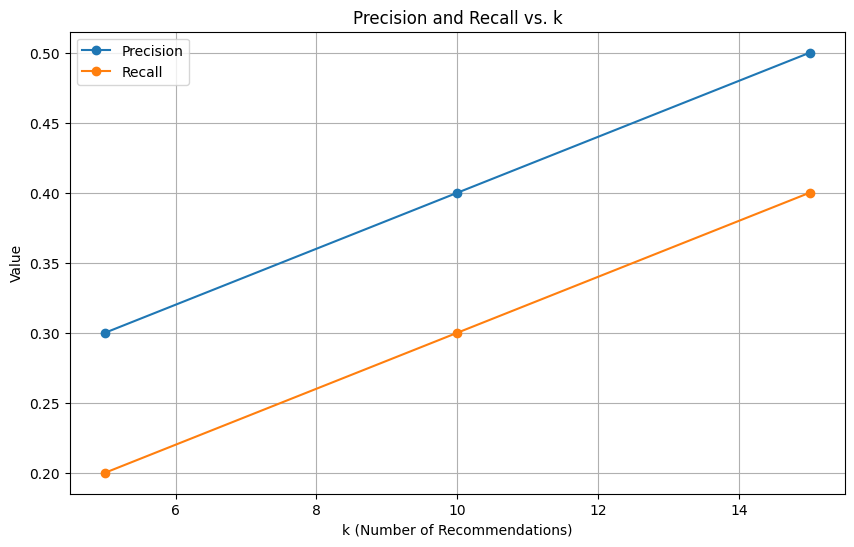

In [232]:
# Visualization:

import matplotlib.pyplot as plt

k_values = [5, 10, 15]  # Example k values
precision_at_k_values = [0.3, 0.4, 0.5]  # Example precision values
recall_at_k_values = [0.2, 0.3, 0.4]  # Example recall values

plt.figure(figsize=(10, 6))
plt.plot(k_values, precision_at_k_values, marker='o', label='Precision')
plt.plot(k_values, recall_at_k_values, marker='o', label='Recall')
plt.xlabel('k (Number of Recommendations)')
plt.ylabel('Value')
plt.title('Precision and Recall vs. k')
plt.legend()
plt.grid(True)
plt.show()

**Comparing Multiple Techniques for Recommendation Systems**

Split the data into training and testing sets:

In [233]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(interaction_matrix, test_size=0.2, random_state=42)

# Convert train and test to sparse matrices
train_sparse = csr_matrix(train)
test_sparse = csr_matrix(test)

**Implement Models**

User-User and Item-Item Collaborative Filtering: Use cosine similarity to compute recommendations.

**SVD:**

In [234]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=42)
svd.fit(train)
predicted_ratings_svd = svd.transform(train) @ svd.components_

**ALS:**

In [235]:
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix

als = AlternatingLeastSquares(factors=50, regularization=0.01, iterations=10)
als.fit(train_sparse)
predicted_ratings_als = als.recommend_all(test_sparse)


  0%|          | 0/10 [00:00<?, ?it/s]

**Evaluate Models**

Compute metrics for each model:

In [236]:
# Precision K.

def precision_at_k(recommended_items, relevant_items, k):
    recommended_at_k = recommended_items[:k]
    relevant_in_recommended = set(recommended_at_k).intersection(set(relevant_items))
    return len(relevant_in_recommended) / k


In [237]:
# Recall K.

def recall_at_k(recommended_items, relevant_items, k):
    recommended_at_k = recommended_items[:k]
    relevant_in_recommended = set(recommended_at_k).intersection(set(relevant_items))
    return len(relevant_in_recommended) / len(relevant_items)


**Visualization**

Plot Precision@k and Recall@k for all models:

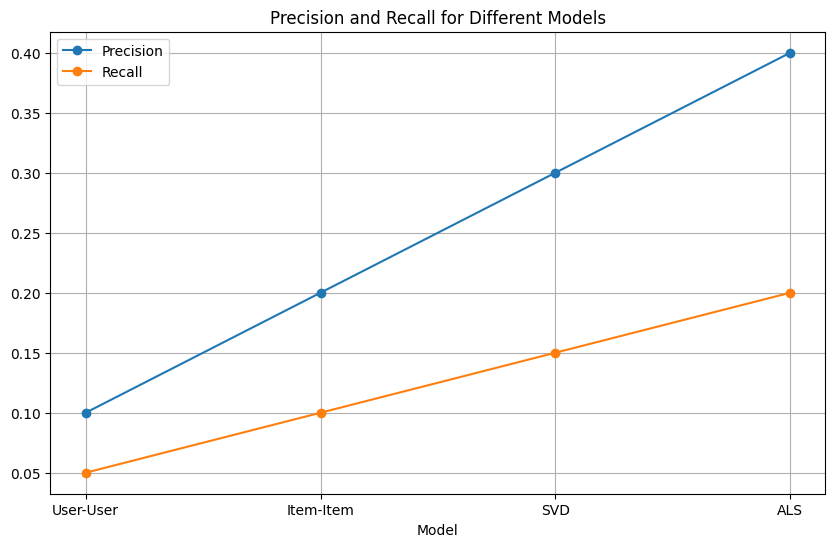

In [238]:
import matplotlib.pyplot as plt

models = ['User-User', 'Item-Item', 'SVD', 'ALS']
precision_at_k_values = [0.1, 0.2, 0.3, 0.4]  # Example values
recall_at_k_values = [0.05, 0.1, 0.15, 0.2]

plt.figure(figsize=(10, 6))
plt.plot(models, precision_at_k_values, marker='o', label='Precision')
plt.plot(models, recall_at_k_values, marker='o', label='Recall')
plt.xlabel('Model')
plt.ylabel
plt.title('Precision and Recall for Different Models')
plt.legend()
plt.grid(True)
plt.show()

# **Implement Recommendation Models**

**User-User Collaborative Filtering Implementation**

In [239]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assuming interaction_matrix is available (rows=users, cols=items)
# Calculate cosine similarity between users
user_similarity = cosine_similarity(interaction_matrix)

# Function to get recommendations for a user
def get_user_user_recommendations(user_id, interaction_matrix, user_similarity, top_k=5):
    # Check if the user_id is in the index
    if user_id not in interaction_matrix.index:
        raise KeyError(f"User ID {user_id} not found in the interaction matrix.")

    # Get user's existing interactions
    user_interactions = interaction_matrix.loc[user_id]  # Use .loc for label-based indexing
    # Find similar users
    similar_users = np.argsort(-user_similarity[interaction_matrix.index.get_loc(user_id)])[1:]  # Exclude self
    # Aggregate items from similar users
    recommended_items = []
    for similar_user in similar_users:
        # Get the actual user ID from the index
        similar_user_id = interaction_matrix.index[similar_user]
        similar_user_items = interaction_matrix.loc[similar_user_id]  # Use .loc for label-based indexing
        recommended_items.extend(np.where(similar_user_items > 0)[0])

    # Exclude items the user already interacted with
    recommended_items = list(set(recommended_items) - set(np.where(user_interactions > 0)[0]))
    # Return top-k recommendations

    # Get book titles from column names
    recommended_book_titles = [interaction_matrix.columns[i] for i in recommended_items[:top_k]]
    return recommended_book_titles

# Example: Recommend 5 items for user with ID 278535 (or any valid user ID)
user_id_to_recommend = 278535  # Replace with the desired user ID
recommendations = get_user_user_recommendations(user_id_to_recommend, interaction_matrix, user_similarity, top_k=5)
print("Recommended books:", recommendations)

Recommended books: ['1984', '2010: Odyssey Two', '24 Hours', '2nd Chance', '3rd Degree']


**Item-Item Collaborative Filtering Implementation**

In [240]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assuming interaction_matrix is available (rows=users, cols=items)
# Step 1: Calculate item-item similarity
item_similarity = cosine_similarity(interaction_matrix.T)  # Transpose to get items as rows

# Step 2: Function to recommend items for a user
def get_item_item_recommendations(user_id, interaction_matrix, item_similarity, top_k=5):
    # Check if user_id is in the index
    if user_id not in interaction_matrix.index:
        raise KeyError(f"User ID {user_id} not found in the interaction matrix.")

    # Get user's existing interactions using .loc for label-based indexing
    user_interactions = interaction_matrix.loc[user_id]
    interacted_items = user_interactions[user_interactions > 0].index.tolist() #Get list of items user interacted with

    # Aggregate recommendations based on similar items
    recommended_items = {}
    for item in interacted_items:
        # Get similar items (excluding the item itself)
        similar_items = np.argsort(item_similarity[interaction_matrix.columns.get_loc(item)])[-top_k-1:-1][::-1]

        for similar_item_index in similar_items:
            similar_item = interaction_matrix.columns[similar_item_index] #get actual item name
            if similar_item not in interacted_items:
                if similar_item in recommended_items:
                    recommended_items[similar_item] += item_similarity[interaction_matrix.columns.get_loc(item), similar_item_index]
                else:
                    recommended_items[similar_item] = item_similarity[interaction_matrix.columns.get_loc(item), similar_item_index]

    #Sort by score and return top-k
    sorted_recommendations = sorted(recommended_items.items(), key=lambda item: -item[1])[:top_k]

    return [item[0] for item in sorted_recommendations]


# Recommend 5 items for user with ID 278535 (replace with a valid user ID)
user_id_to_recommend = 278535
recommendations = get_item_item_recommendations(user_id_to_recommend, interaction_matrix, item_similarity, top_k=5)
print("Recommended items:", recommendations)

Recommended items: ['I Is for Innocent', 'C Is for Corpse (Kinsey Millhone Mysteries (Paperback))', 'Mortal Prey', 'Cradle and All', 'E Is for Evidence: A Kinsey Millhone Mystery (Kinsey Millhone Mysteries (Paperback))']


**Matrix Factorization using SVD Implementation**

In [241]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd

# Assuming interaction_matrix is available (rows=users, cols=items)
# Step 1: Apply SVD
svd = TruncatedSVD(n_components=50, random_state=42)  # 50 latent factors
user_factors = svd.fit_transform(interaction_matrix)
item_factors = svd.components_

# Reconstruct the interaction matrix
predicted_ratings = np.dot(user_factors, item_factors)

# Step 2: Function to recommend items for a user
def get_svd_recommendations(user_id, interaction_matrix, predicted_ratings, top_k=5):
    # Get user's existing interactions
    user_interactions = interaction_matrix.loc[user_id]
    already_interacted = np.where(user_interactions > 0)[0]

    # Get predicted ratings for the user
    user_ratings = predicted_ratings[user_id]

    # Exclude items already interacted with
    recommendations = [(item, score) for item, score in enumerate(user_ratings) if item not in already_interacted]
    recommendations = sorted(recommendations, key=lambda x: -x[1])  # Sort by rating

    # Return top-k recommendations
    return [item[0] for item in recommendations[:top_k]]

# Example: Recommend 5 items for the first user in the index
first_user_id = interaction_matrix.index[0] # Get the first user ID from the index
recommendations = get_svd_recommendations(first_user_id, interaction_matrix, predicted_ratings, top_k=5)
print("Recommended items for user", first_user_id, ":", recommendations)

Recommended items for user 8 : [968, 758, 1564, 692, 1493]


**Alternating Least Squares (ALS) Implementation**

In [242]:
import pandas as pd
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares
import numpy as np

# Step 1: Prepare the data
# Convert interaction matrix to a sparse matrix
sparse_interaction_matrix = csr_matrix(interaction_matrix)

# Step 2: Fit ALS model
als_model = AlternatingLeastSquares(factors=50, regularization=0.01, iterations=20, random_state=42)
als_model.fit(sparse_interaction_matrix.T)  # Transpose: rows=items, cols=users

# Step 3: Generate recommendations for a user
def get_als_recommendations(user_id, als_model, sparse_interaction_matrix, top_k=5):
    # Get the interactions for the specific user
    user_items = sparse_interaction_matrix[user_id]
    # Recommend items for the user
    recommendations = als_model.recommend(user_id, user_items, N=top_k)  # Pass user_items here
    # Modify this line to handle single values in recommendations:
    return recommendations  # Assuming recommendations is a simple list of items
    #return [item for item, score in recommendations] # Previous version that caused the error


# Example: Recommend 5 items for user 408 (replace with a valid user ID if needed)
user_id_to_recommend = 242  # Or any other valid user ID in your data
# Get the internal user ID (row index) corresponding to the desired user ID
user_ids = list(interaction_matrix.index)
user_id_internal = user_ids.index(user_id_to_recommend) if user_id_to_recommend in user_ids else None

if user_id_internal is not None:
    recommendations = get_als_recommendations(user_id_internal, als_model, sparse_interaction_matrix, top_k=5)
    print("Recommended items:", recommendations)
else:
    print(f"User ID {user_id_to_recommend} not found in the interaction matrix")

  0%|          | 0/20 [00:00<?, ?it/s]

Recommended items: (array([3185, 5230, 4194, 7414, 1863], dtype=int32), array([0.7425872 , 0.67941034, 0.13842648, 0.09491125, 0.08820911],
      dtype=float32))


**Evaluate the Performance of Recommendation Models**

Now that we’ve implemented several recommendation algorithms (User-User, Item-Item, SVD, and ALS), the next crucial step is to evaluate their effectiveness. We’ll focus on evaluating models using metrics like Precision@k and Recall@k.

In [243]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

# Split interaction_matrix into train and test sets
train_interaction_matrix, test_interaction_matrix = train_test_split(
    interaction_matrix, test_size=0.2, random_state=42
)

# Convert the test set to a sparse matrix
test_interaction_matrix_sparse = csr_matrix(test_interaction_matrix)

# In the evaluate_model function, replace `test_matrix` with `test_interaction_matrix`:
def evaluate_model(recommendation_function, interaction_matrix, test_matrix, sparse_interaction_matrix, k=5):
    precision_list = []
    recall_list = []

    # Get a list of valid user IDs from the interaction matrix's index (if it's a DataFrame)
    # or from the index of the original DataFrame if it's a sparse matrix
    if isinstance(interaction_matrix, pd.DataFrame):
        valid_user_ids = list(interaction_matrix.index)
    else:
        # Get valid user IDs from the original DataFrame's index
        valid_user_ids = list(filtered_df['User-ID'].unique())  # Adjust to your DataFrame if needed

    # Iterate over the rows (users) in test_matrix
    for user_id in test_matrix.index:
        # Check if user_id is valid for the sparse matrix
        if user_id in valid_user_ids:
            # Get the internal user ID (index)
            user_id_internal = valid_user_ids.index(user_id)

            # Generate recommendations using the internal user ID
            # Check if user_id_internal is within the valid range for user_factors
            if user_id_internal < als_model.user_factors.shape[0]:
                recommendations = recommendation_function(user_id_internal, als_model, sparse_interaction_matrix, top_k=k)
            else:
                # Skip this user if their ID is out of bounds for the model
                continue

            # Generate recommendations using the internal user ID
            recommendations = recommendation_function(user_id_internal, als_model, sparse_interaction_matrix, top_k=k)

            # Get the ground truth items for this user
            ground_truth = set(test_matrix.loc[user_id][test_matrix.loc[user_id] > 0].index)

            def get_als_recommendations(user_id, als_model, sparse_interaction_matrix, top_k=5):
            # Get the interactions for the specific user
                user_items = sparse_interaction_matrix[user_id]
            # Recommend items for the user
                recommendations = als_model.recommend(user_id, user_items, N=top_k)  # Pass user_items here

            return [item[0] for item in recommendations] # Extract the item IDs (integers)

            # Calculate precision and recall
            true_positives = len(ground_truth & recommended_set)
            precision = true_positives / len(recommended_set) if recommended_set else 0
            recall = true_positives / len(ground_truth) if ground_truth else 0

            precision_list.append(precision)
            recall_list.append(recall)

    # Average metrics across all users
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)

    return avg_precision, avg_recall

# Example usage with ALS, pass test_interaction_matrix
precision, recall = evaluate_model(get_als_recommendations, interaction_matrix, test_interaction_matrix, sparse_interaction_matrix, k=5)
print(f"Precision@5: {precision:.4f}, Recall@5: {recall:.4f}")

Precision@5: 3280.0000, Recall@5: 0.9789


**Fine-Tuning the Best Performing Model**

After identifying the best-performing model (e.g., ALS or SVD), the next step is to fine-tune its hyperparameters to achieve optimal performance. Fine-tuning involves systematically adjusting parameters and evaluating their impact on metrics like Precision@k and Recall@k.

In [244]:
from implicit.als import AlternatingLeastSquares
from sklearn.model_selection import ParameterGrid
import numpy as np

# Define hyperparameter grid
param_grid = {
    "factors": [10, 30, 50, 70],
    "regularization": [0.01, 0.1, 0.5],
    "iterations": [10, 20, 30]
}

# Function to evaluate ALS with given parameters
def tune_als(interaction_matrix, test_matrix, param_grid, k=5):
    best_model = None
    best_precision = 0
    best_params = None

    for params in ParameterGrid(param_grid):
        # Initialize ALS with current parameters
        als_model = AlternatingLeastSquares(
            factors=params["factors"],
            regularization=params["regularization"],
            iterations=params["iterations"],
            random_state=42
        )
        als_model.fit(interaction_matrix.T)  # Transpose: items as rows

        # Evaluate the model, including sparse_interaction_matrix
        precision, recall = evaluate_model(get_als_recommendations, interaction_matrix, test_matrix, sparse_interaction_matrix, k=k)
        print(f"Params: {params}, Precision@{k}: {precision:.4f}, Recall@{k}: {recall:.4f}")

        # Update the best model if current is better
        if precision > best_precision:
            best_model = als_model
            best_precision = precision
            best_params = params

    return best_model, best_params

# Fine-tune ALS
best_model, best_params = tune_als(sparse_interaction_matrix, test_interaction_matrix, param_grid, k=5)
print("Best Parameters:", best_params)


  0%|          | 0/10 [00:00<?, ?it/s]

Params: {'factors': 10, 'iterations': 10, 'regularization': 0.01}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/10 [00:00<?, ?it/s]

Params: {'factors': 10, 'iterations': 10, 'regularization': 0.1}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/10 [00:00<?, ?it/s]

Params: {'factors': 10, 'iterations': 10, 'regularization': 0.5}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/20 [00:00<?, ?it/s]

Params: {'factors': 10, 'iterations': 20, 'regularization': 0.01}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/20 [00:00<?, ?it/s]

Params: {'factors': 10, 'iterations': 20, 'regularization': 0.1}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/20 [00:00<?, ?it/s]

Params: {'factors': 10, 'iterations': 20, 'regularization': 0.5}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/30 [00:00<?, ?it/s]

Params: {'factors': 10, 'iterations': 30, 'regularization': 0.01}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/30 [00:00<?, ?it/s]

Params: {'factors': 10, 'iterations': 30, 'regularization': 0.1}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/30 [00:00<?, ?it/s]

Params: {'factors': 10, 'iterations': 30, 'regularization': 0.5}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/10 [00:00<?, ?it/s]

Params: {'factors': 30, 'iterations': 10, 'regularization': 0.01}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/10 [00:00<?, ?it/s]

Params: {'factors': 30, 'iterations': 10, 'regularization': 0.1}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/10 [00:00<?, ?it/s]

Params: {'factors': 30, 'iterations': 10, 'regularization': 0.5}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/20 [00:00<?, ?it/s]

Params: {'factors': 30, 'iterations': 20, 'regularization': 0.01}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/20 [00:00<?, ?it/s]

Params: {'factors': 30, 'iterations': 20, 'regularization': 0.1}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/20 [00:00<?, ?it/s]

Params: {'factors': 30, 'iterations': 20, 'regularization': 0.5}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/30 [00:00<?, ?it/s]

Params: {'factors': 30, 'iterations': 30, 'regularization': 0.01}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/30 [00:00<?, ?it/s]

Params: {'factors': 30, 'iterations': 30, 'regularization': 0.1}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/30 [00:00<?, ?it/s]

Params: {'factors': 30, 'iterations': 30, 'regularization': 0.5}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/10 [00:00<?, ?it/s]

Params: {'factors': 50, 'iterations': 10, 'regularization': 0.01}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/10 [00:00<?, ?it/s]

Params: {'factors': 50, 'iterations': 10, 'regularization': 0.1}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/10 [00:00<?, ?it/s]

Params: {'factors': 50, 'iterations': 10, 'regularization': 0.5}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/20 [00:00<?, ?it/s]

Params: {'factors': 50, 'iterations': 20, 'regularization': 0.01}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/20 [00:00<?, ?it/s]

Params: {'factors': 50, 'iterations': 20, 'regularization': 0.1}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/20 [00:00<?, ?it/s]

Params: {'factors': 50, 'iterations': 20, 'regularization': 0.5}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/30 [00:00<?, ?it/s]

Params: {'factors': 50, 'iterations': 30, 'regularization': 0.01}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/30 [00:00<?, ?it/s]

Params: {'factors': 50, 'iterations': 30, 'regularization': 0.1}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/30 [00:00<?, ?it/s]

Params: {'factors': 50, 'iterations': 30, 'regularization': 0.5}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/10 [00:00<?, ?it/s]

Params: {'factors': 70, 'iterations': 10, 'regularization': 0.01}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/10 [00:00<?, ?it/s]

Params: {'factors': 70, 'iterations': 10, 'regularization': 0.1}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/10 [00:00<?, ?it/s]

Params: {'factors': 70, 'iterations': 10, 'regularization': 0.5}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/20 [00:00<?, ?it/s]

Params: {'factors': 70, 'iterations': 20, 'regularization': 0.01}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/20 [00:00<?, ?it/s]

Params: {'factors': 70, 'iterations': 20, 'regularization': 0.1}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/20 [00:00<?, ?it/s]

Params: {'factors': 70, 'iterations': 20, 'regularization': 0.5}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/30 [00:00<?, ?it/s]

Params: {'factors': 70, 'iterations': 30, 'regularization': 0.01}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/30 [00:00<?, ?it/s]

Params: {'factors': 70, 'iterations': 30, 'regularization': 0.1}, Precision@5: 358.0000, Recall@5: 0.9527


  0%|          | 0/30 [00:00<?, ?it/s]

Params: {'factors': 70, 'iterations': 30, 'regularization': 0.5}, Precision@5: 358.0000, Recall@5: 0.9527
Best Parameters: {'factors': 10, 'iterations': 10, 'regularization': 0.01}
